# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.008927e+01     7.961330e+00
 * time: 0.005482912063598633
     1     2.534483e+01     4.555543e+00
 * time: 0.015573978424072266
     2     1.991364e+01     6.387735e+00
 * time: 0.12430381774902344
     3     1.715443e+01     6.223175e+00
 * time: 0.14930391311645508
     4     1.312654e+01     2.432794e+00
 * time: 0.17555689811706543
     5     1.122052e+01     1.030842e+00
 * time: 0.20058989524841309
     6     1.064351e+01     1.463349e+00
 * time: 0.2194688320159912
     7     1.018611e+01     8.590136e-01
 * time: 0.23843884468078613
     8     1.002703e+01     7.502392e-01
 * time: 0.26053786277770996
     9     9.873743e+00     9.635612e-01
 * time: 0.2791008949279785
    10     9.693391e+00     5.058661e-01
 * time: 0.297623872756958
    11     9.675866e+00     7.989894e-01
 * time: 0.31363677978515625
    12     9.623371e+00     8.066995e-01
 * time: 0.32764101028442383
    13     9.552941e+00     7.903763e-01
 * time: 0

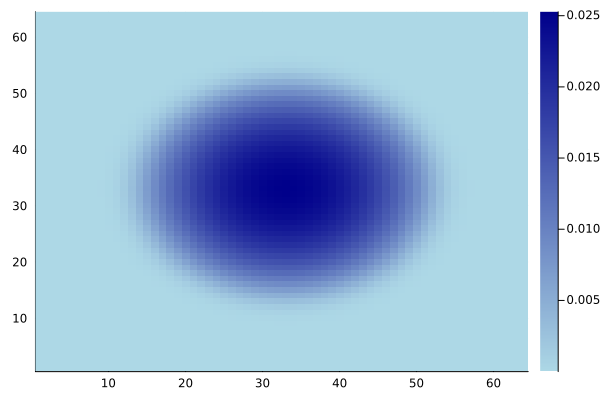

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)